In [115]:
import pandas as pd
import numpy as np
import tifffile as tiff

import re

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parsing NeuGen output

In [136]:
file = open("test.txt", 'r')
first = True
# for i, line in enumerate(file.readlines()):
lines = file.readlines()

num_curves = 75

x_max = 0
x_min = float('Inf')

y_max = 0
y_min = float('Inf')

z_max = 0
z_min = float('Inf')

# while (i < 200):
curves = []
curve = []

i = 2
while (i < len(lines)):
    line = re.sub(r"[\n\t]*", "", lines[i])
    if 'begin' in line:
        if 'synapse' in line:
            i += 3
        else:
            i += 2
    elif 'end' in line:
        curves.append(np.array(curve))
        curve = []
        num_curves -= 1
        if num_curves == 0:
            break
    else:
        coords = [float(s) for s in line.split(' ')]
        coords = np.array(coords[:3])
        curve.append(coords)
        print(coords)
        x, y, z = coords
        
        x_max = x if x > x_max else x_max
        x_min = x if x < x_min else x_min
        y_max = y if y > y_max else y_max
        y_min = y if y < y_min else y_min
        z_max = z if z > z_max else z_max
        z_min = z if z < z_min else z_min

#     if line == 'end':
#         break
    i += 1

curves = np.array(curves)

[ 574.517  500.72   838.144]
[ 574.517  500.72   838.644]
[ 574.517  500.72   839.144]
[ 574.517  500.72   839.644]
[ 574.517  500.72   840.144]
[ 574.517  500.72   840.644]
[ 574.517  500.72   841.144]
[ 574.517  500.72   841.644]
[ 574.517  500.72   842.144]
[ 574.517  500.72   842.644]
[ 574.517  500.72   843.144]
[ 574.517  500.72   843.644]
[ 574.517  500.72   844.144]
[ 574.517  500.72   844.644]
[ 574.517  500.72   845.144]
[ 574.517  500.72   845.644]
[ 574.517  500.72   846.144]
[ 574.517  500.72   846.644]
[ 574.517  500.72   847.144]
[ 574.517  500.72   847.644]
[ 574.517  500.72   848.144]
[ 574.517  500.72   848.144]
[ 574.517  500.72   858.144]
[ 574.517  500.72   858.144]
[ 574.517  500.72   873.144]
[ 574.517  500.72   873.144]
[ 573.782  501.125  877.055]
[ 572.769  498.608  879.995]
[ 572.769  498.608  879.995]
[ 571.76   500.283  883.484]
[ 571.088  502.274  886.888]
[ 571.99   502.13   890.782]
[ 572.004  501.767  894.765]
[ 573.33   501.142  898.487]
[ 571.816  502

In [137]:
print(x_min, x_max)
print(y_min, y_max)
print(z_min, z_max)

499.036 655.894
414.791 597.815
838.144 1274.471


In [138]:
print(curves)

[ array([[ 574.517,  500.72 ,  838.144],
       [ 574.517,  500.72 ,  838.644],
       [ 574.517,  500.72 ,  839.144],
       [ 574.517,  500.72 ,  839.644],
       [ 574.517,  500.72 ,  840.144],
       [ 574.517,  500.72 ,  840.644],
       [ 574.517,  500.72 ,  841.144],
       [ 574.517,  500.72 ,  841.644],
       [ 574.517,  500.72 ,  842.144],
       [ 574.517,  500.72 ,  842.644],
       [ 574.517,  500.72 ,  843.144],
       [ 574.517,  500.72 ,  843.644],
       [ 574.517,  500.72 ,  844.144],
       [ 574.517,  500.72 ,  844.644],
       [ 574.517,  500.72 ,  845.144],
       [ 574.517,  500.72 ,  845.644],
       [ 574.517,  500.72 ,  846.144],
       [ 574.517,  500.72 ,  846.644],
       [ 574.517,  500.72 ,  847.144],
       [ 574.517,  500.72 ,  847.644],
       [ 574.517,  500.72 ,  848.144]])
 array([[ 574.517,  500.72 ,  848.144],
       [ 574.517,  500.72 ,  858.144]])
 array([[ 574.517,  500.72 ,  858.144],
       [ 574.517,  500.72 ,  873.144]])
 array([[ 574.517,

# do this to normalize values

In [139]:
min_val = min(x_min, y_min, z_min)
curves += -min_val

In [140]:
print(curves)

[ array([[ 159.726,   85.929,  423.353],
       [ 159.726,   85.929,  423.853],
       [ 159.726,   85.929,  424.353],
       [ 159.726,   85.929,  424.853],
       [ 159.726,   85.929,  425.353],
       [ 159.726,   85.929,  425.853],
       [ 159.726,   85.929,  426.353],
       [ 159.726,   85.929,  426.853],
       [ 159.726,   85.929,  427.353],
       [ 159.726,   85.929,  427.853],
       [ 159.726,   85.929,  428.353],
       [ 159.726,   85.929,  428.853],
       [ 159.726,   85.929,  429.353],
       [ 159.726,   85.929,  429.853],
       [ 159.726,   85.929,  430.353],
       [ 159.726,   85.929,  430.853],
       [ 159.726,   85.929,  431.353],
       [ 159.726,   85.929,  431.853],
       [ 159.726,   85.929,  432.353],
       [ 159.726,   85.929,  432.853],
       [ 159.726,   85.929,  433.353]])
 array([[ 159.726,   85.929,  433.353],
       [ 159.726,   85.929,  443.353]])
 array([[ 159.726,   85.929,  443.353],
       [ 159.726,   85.929,  458.353]])
 array([[ 159.726,

In [141]:
curves = curves.tolist()
curves.append(np.array([np.array([207, 41, 691]), np.array([237, 3, 753])]))
curves = np.array(curves)

In [142]:
print(curves)

[ array([[ 159.726,   85.929,  423.353],
       [ 159.726,   85.929,  423.853],
       [ 159.726,   85.929,  424.353],
       [ 159.726,   85.929,  424.853],
       [ 159.726,   85.929,  425.353],
       [ 159.726,   85.929,  425.853],
       [ 159.726,   85.929,  426.353],
       [ 159.726,   85.929,  426.853],
       [ 159.726,   85.929,  427.353],
       [ 159.726,   85.929,  427.853],
       [ 159.726,   85.929,  428.353],
       [ 159.726,   85.929,  428.853],
       [ 159.726,   85.929,  429.353],
       [ 159.726,   85.929,  429.853],
       [ 159.726,   85.929,  430.353],
       [ 159.726,   85.929,  430.853],
       [ 159.726,   85.929,  431.353],
       [ 159.726,   85.929,  431.853],
       [ 159.726,   85.929,  432.353],
       [ 159.726,   85.929,  432.853],
       [ 159.726,   85.929,  433.353]])
 array([[ 159.726,   85.929,  433.353],
       [ 159.726,   85.929,  443.353]])
 array([[ 159.726,   85.929,  443.353],
       [ 159.726,   85.929,  458.353]])
 array([[ 159.726,

# making tif with dimensions

In [143]:
tif_shape = np.array([int(np.ceil(x_max)), int(np.ceil(y_max)), int(np.ceil(z_max))]) - int(np.ceil(min_val))

In [144]:
data = np.zeros(tif_shape.tolist())
print(data.shape)

(241, 183, 860)


In [151]:
tiff.imsave('test_gen.tif', data)

# Plotting curves

In [146]:
def plot_curves_on_tif(points, reference_img_path, tif_output_path, overwrite=False):
    """Given a CSV file, plots the co-ordinates in the CSV on a TIF stack"""
    def _parse_int_array(arr):
        return [int(item) for item in arr]

    def _draw_square(image, coord, size=2):
        coord = _parse_int_array(coord)
        shape_z, shape_y, shape_x = image.shape
        z_range = range(max(0, coord[0]-size), min(shape_z, coord[0]+size))
        y_range = range(max(0, coord[1]-size), min(shape_y, coord[1]+size))
        x_range = range(max(0, coord[2]-size), min(shape_x, coord[2]+size))

        for z in z_range:
            for y in y_range:
                for x in x_range:
                    image[z, y, x] = 255

        return image
    
    ref_image = tiff.imread(reference_img_path)
    if len(ref_image.shape) == 4:
        ref_image = ref_image[:,:,:,0]
    shape_z, shape_y, shape_x = ref_image.shape

    if overwrite:
        annotated_image = ref_image
    else:
        annotated_image = np.zeros((shape_z, shape_y, shape_x))
        
    for i in range(1, len(points)):
        diff = points[i] - points[i-1]
        mag = np.linalg.norm(diff)
        for j in range(0, int(mag)):
            pt = points[i-1] + (float(j) / mag) * diff
            annotated_image = _draw_square(annotated_image, pt)
        
    tiff.imsave(tif_output_path, annotated_image.astype(np.uint8))

In [152]:
# this is doing the actual plotting
for curve in curves:
    plot_curves_on_tif(curve, 'test_gen.tif', 'test_gen.tif', overwrite=True)

In [148]:
print(curves)

[ array([[ 159.726,   85.929,  423.353],
       [ 159.726,   85.929,  423.853],
       [ 159.726,   85.929,  424.353],
       [ 159.726,   85.929,  424.853],
       [ 159.726,   85.929,  425.353],
       [ 159.726,   85.929,  425.853],
       [ 159.726,   85.929,  426.353],
       [ 159.726,   85.929,  426.853],
       [ 159.726,   85.929,  427.353],
       [ 159.726,   85.929,  427.853],
       [ 159.726,   85.929,  428.353],
       [ 159.726,   85.929,  428.853],
       [ 159.726,   85.929,  429.353],
       [ 159.726,   85.929,  429.853],
       [ 159.726,   85.929,  430.353],
       [ 159.726,   85.929,  430.853],
       [ 159.726,   85.929,  431.353],
       [ 159.726,   85.929,  431.853],
       [ 159.726,   85.929,  432.353],
       [ 159.726,   85.929,  432.853],
       [ 159.726,   85.929,  433.353]])
 array([[ 159.726,   85.929,  433.353],
       [ 159.726,   85.929,  443.353]])
 array([[ 159.726,   85.929,  443.353],
       [ 159.726,   85.929,  458.353]])
 array([[ 159.726,

In [149]:
print(curves[18])

[[ 207.573   41.869  691.535]
 [ 209.518   38.856  693.308]
 [ 212.359   36.29   694.466]
 [ 212.589   35.499  698.381]
 [ 212.847   34.953  702.335]
 [ 214.152   34.009  705.996]
 [ 215.901   32.283  709.152]
 [ 217.746   29.753  711.642]
 [ 218.617   30.715  715.425]
 [ 220.001   29.214  718.865]
 [ 222.408   28.164  721.882]
 [ 222.633   27.181  725.753]
 [ 224.339   24.135  727.705]
 [ 225.572   21.621  730.562]
 [ 227.501   18.318  731.733]
 [ 228.485   18.088  735.604]
 [ 230.389   17.565  739.082]
 [ 230.042   16.114  742.794]
 [ 230.693   12.553  744.495]
 [ 233.642    9.938  745.177]
 [ 235.358    8.302  748.399]
 [ 237.086    7.171  751.824]
 [ 237.673    3.837  753.954]]


[ 691.535  693.308  694.466  698.381  702.335  705.996  709.152  711.642
  715.425  718.865  721.882  725.753  727.705  730.562  731.733  735.604
  739.082  742.794  744.495  745.177  748.399  751.824  753.954]


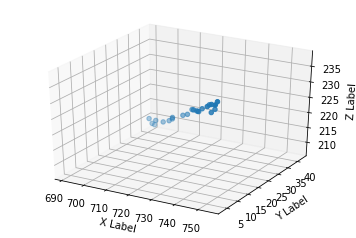

In [125]:
pts1 = curves[18]
zs = pts1[:,0]
ys = pts1[:,1]
xs = pts1[:,2]
print(xs)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
(241, 183, 860)

In [128]:
test_points = np.array([np.array([207, 41, 691]), np.array([237, 3, 753])])
print(test_points)

[[207  41 691]
 [237   3 753]]


In [126]:
print(curves)

[ array([[ 159.726,   85.929,  423.353],
       [ 159.726,   85.929,  423.853],
       [ 159.726,   85.929,  424.353],
       [ 159.726,   85.929,  424.853],
       [ 159.726,   85.929,  425.353],
       [ 159.726,   85.929,  425.853],
       [ 159.726,   85.929,  426.353],
       [ 159.726,   85.929,  426.853],
       [ 159.726,   85.929,  427.353],
       [ 159.726,   85.929,  427.853],
       [ 159.726,   85.929,  428.353],
       [ 159.726,   85.929,  428.853],
       [ 159.726,   85.929,  429.353],
       [ 159.726,   85.929,  429.853],
       [ 159.726,   85.929,  430.353],
       [ 159.726,   85.929,  430.853],
       [ 159.726,   85.929,  431.353],
       [ 159.726,   85.929,  431.853],
       [ 159.726,   85.929,  432.353],
       [ 159.726,   85.929,  432.853],
       [ 159.726,   85.929,  433.353]])
 array([[ 159.726,   85.929,  433.353],
       [ 159.726,   85.929,  443.353]])
 array([[ 159.726,   85.929,  443.353],
       [ 159.726,   85.929,  458.353]])
 array([[ 159.726,

In [150]:
plot_curves_on_tif(curves[18], 'test.tif', 'test_gen_18.tif')